Firstly we import all of the packages, 
numpy and pandas for data handling,
tensorflow for actually building the CNN neural netwrok,
sci-kit learn for evaluation metrics,
matplotlib for visualizing what are CNN model is doing and 
category_encoder for implementing binary encoding for labels.

In [2]:
import numpy as np

import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer

We load the augmented mean-max pooled data files which have a fixed size of 20 rows and 25000 columns

In [3]:
def load_mfcc_files(directory):
    mfcc_data = []
    for file in os.listdir(directory):
            print(file)
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path, header=None).values
            mfcc_data.append(data)
            print(data.shape)
    return mfcc_data

# Load MFCC data
asha = load_mfcc_files(r"D:\mahima files\short data aug\ab")            #path to augmented files generated
bhavgeet = load_mfcc_files(r"D:\mahima files\short data aug\bhav")
kishor = load_mfcc_files(r"D:\mahima files\short data aug\kk")
lavni = load_mfcc_files(r"D:\mahima files\short data aug\lavni")
michael = load_mfcc_files(r"D:\mahima files\short data aug\mj")
national = load_mfcc_files(r"D:\mahima files\short data aug\na")


print(f"Asha Bhosle: {len(asha)} files")
print(f"Bhavgeet: {len(bhavgeet)} files")
print(f"Kishor Kumar: {len(kishor)} files")
print(f"Lavni: {len(lavni)} files")
print(f"Michael Jackson: {len(michael)} files")
print(f"National Anthem: {len(national)} files")

aug_1_Aaiye Meharban - Howrah Bridge 1958 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aaja Aaja - Yeh Raaste Hain Pyaar Ke 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aao Huzoor Tumko - Kismet 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aasmaa - Saand Ki Aankh 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Aise Jalta Hai Jiya - 1920 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Allahu - Dev 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Andhere - 31st October 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Ankh Milaoongi - Fiza 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Baila Baila - Khwahish 128 Kbps_MFCC.csv
(20, 25000)
aug_1_Bhanwara Bada Nadan Asha Bhosle - Sahib Bibi Aur Ghulam 128 Kbps_MFCC.csv
(20, 25000)
aug_1_bollywood_MKS 1978 - O Saathi Re Tere Bina-Female_MFCC.csv
(20, 25000)
aug_1_bollywood_MS 1966 - Jhumka Gira Re_MFCC.csv
(20, 25000)
aug_1_bollywood_Rangeela 1995 - Tanha Tanha Yahan Pe_MFCC.csv
(20, 25000)
aug_1_bollywood_STK 1982 - Kitne Bhi Tu(Female)_MFCC.csv
(20, 25000)
aug_1_bollywood_UJ 1981 - Dil Cheez Kya Hai_MFCC.csv
(20, 25000)
aug_1_

Convert the loaded files into then numpy error and we explicitly mentioned the data type as float to ensure that there is no misinterpretation of data by numpy.

In [4]:
asha = np.array(asha,dtype='float32')
bhavgeet = np.array(bhavgeet,dtype='float32')
kishor=np.array(kishor,dtype='float32')
lavni=np.array(lavni,dtype='float32')
michael=np.array(michael,dtype='float32')
national=np.array(national,dtype='float32')

print(asha.shape)
print(bhavgeet.shape)
print(kishor.shape)
print(lavni.shape)
print(michael.shape)
print(national.shape)


(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)
(125, 20, 25000)


Implemntation of Binary Encoding.

In [6]:

# Combine data
data = np.concatenate((asha, bhavgeet, kishor, lavni, michael, national), axis=0)

# Create labels
labels = ['asha'] * len(asha) + ['bhavgeet'] * len(bhavgeet) + ['kishor'] * len(kishor) + ['lavni'] * len(lavni) + ['michael'] * len(michael) + ['national'] * len(national)

# Encode labels
lb = LabelBinarizer()

# Fit and transform the target variable
y_binary = lb.fit_transform(labels)
print(y_binary)



[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [8]:
# Extract the data without the labels
X = data
# Extract the labels
y = y_binary

# Print the shapes of X and y to verify
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X = X.astype(np.float32)
y = y.astype(np.int32)
print(y)


X shape: (750, 20, 25000)
y shape: (750, 6)
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [9]:
# Step 1: Split the dataset into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(x_val[:1])
print(x_val[:1].shape)

(450, 20, 25000)
(150, 20, 25000)
(150, 20, 25000)
[[[-611.621 -611.621 -611.621 ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  ...
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]
  [   0.       0.       0.    ...    0.       0.       0.   ]]]
(1, 20, 25000)


In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split



# Build the CNN model for feature extraction
def build_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 8, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv1D(64, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv1D(128, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(2, padding='same'))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes for classification
    return model

input_shape = (20, 25000)  # Adjusted to match the input data shape
cnn_model = build_cnn_model(input_shape)

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to match the input shape of the model
x_train = x_train.reshape(-1, 20, 25000)
x_val = x_val.reshape(-1, 20, 25000)
x_test = x_test.reshape(-1, 20, 25000)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the CNN model with early stopping
cnn_model.fit(x_train, y_train, epochs=200, batch_size=16, validation_data=(x_val, y_val), callbacks=[early_stopping, lr_scheduler])

# Assuming X_test and y_test are your test data and labels
X_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int32)  # Ensure y_test is integer type for categorical_crossentropy

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, batch_size=32)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
cnn_model.summary()

# Predict the labels for the test set
y_pred = cnn_model.predict(X_test)
converted_predictions = np.where(y_pred > 0.5, 1, 0)
y_pred_classes = lb.inverse_transform(converted_predictions)


np.set_printoptions(threshold=np.inf, linewidth=np.inf) # This ensures no truncation

y_pred_classes=np.array(y_pred_classes)
print(y_pred_classes)

y_test_classes = lb.inverse_transform(y_test)
y_test_classes=np.array(y_test_classes)
print(y_test_classes )


c:\Users\Dnyaneshwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.2022 - loss: 2.6551 - val_accuracy: 0.1400 - val_loss: 5.6655 - learning_rate: 0.0010
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.3317 - loss: 2.2537 - val_accuracy: 0.1533 - val_loss: 2.9590 - learning_rate: 0.0010
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.4184 - loss: 1.6994 - val_accuracy: 0.1867 - val_loss: 2.3172 - learning_rate: 0.0010
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.4069 - loss: 1.6789 - val_accuracy: 0.3867 - val_loss: 1.7501 - learning_rate: 0.0010
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.4327 - loss: 1.6798 - val_accuracy: 0.5000 - val_loss: 1.4255 - learning_rate: 0.0010
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.4429 - loss: 1.5175 - val_accuracy: 0.4533 - val_loss: 1.3769 - learning_rate: 0.0010
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.5008 - loss: 1.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 20, 32)         │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 10, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 5, 128)         │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,507,252 (74.41 MB)

 Trainable params: 6,502,182 (24.80 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 13,004,366 (49.61 MB)

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step WARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000023DE66EE2A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
['michael' 'kishor' 'bhavgeet' 'kishor' 'kishor' 'national' 'asha' 'bhavgeet' 'michael' 'national' 'asha' 'kishor' 'kishor' 'national' 'bhavgeet' 'kishor' 'asha' 'bhavgeet' 'kishor' 'michael' 'kish

Accuracy: 0.8533333333333334
Precision: 0.8579073272406607
Recall: 0.8533333333333334
F1 Score: 0.8529462909866046
              precision    recall  f1-score   support

        asha       0.79      0.87      0.83        30
    bhavgeet       0.91      0.91      0.91        22
      kishor       0.89      0.83      0.86        29
       lavni       0.90      0.73      0.81        26
     michael       0.70      0.78      0.74        18
    national       0.93      1.00      0.96        25

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150

Confusion Matrix:
[[26  0  0  1  3  0]
 [ 1 20  1  0  0  0]
 [ 3  2 24  0  0  0]
 [ 1  0  1 19  3  2]
 [ 2  0  1  1 14  0]
 [ 0  0  0  0  0 25]]


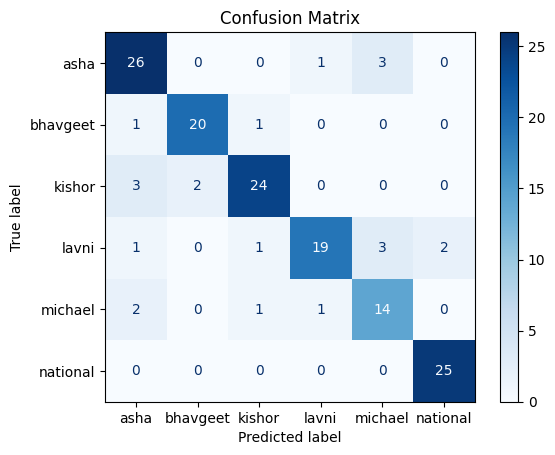

In [20]:
# Ensure y_test is in the correct format (integer labels for multiclass)

# Now calculate the metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print detailed classification report
print(classification_report(y_test_classes, y_pred_classes))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score



# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['asha', 'bhavgeet', 'kishor', 'lavni', 'michael', 'national'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()








In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming X_test and y_test are your test data and labels
X_test = x_test.astype(np.float32)
y_test = y_test.astype(np.int32)  # Ensure y_test is integer type for sparse_categorical_crossentropy

# Predict the probabilities for the test set
y_pred_prob = cnn_model.predict(X_test)

# Binarize the output labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(20, 15), dpi=1000)  # Increase figure size and DPI
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,  # Increase line width
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)  # Add grid
plt.show()

# Print the AUC values for each class
for i in range(n_classes):
    print(f"AUC for class {i}: {roc_auc[i]:.2f}")

# Compute and print the micro-average AUC
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


AUC for class 0: 0.99
AUC for class 1: 1.00
AUC for class 2: 0.99
AUC for class 3: 0.95
AUC for class 4: 0.95
AUC for class 5: 1.00
Micro-average AUC: 0.98


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Visualizing filters for layer: conv1d_3


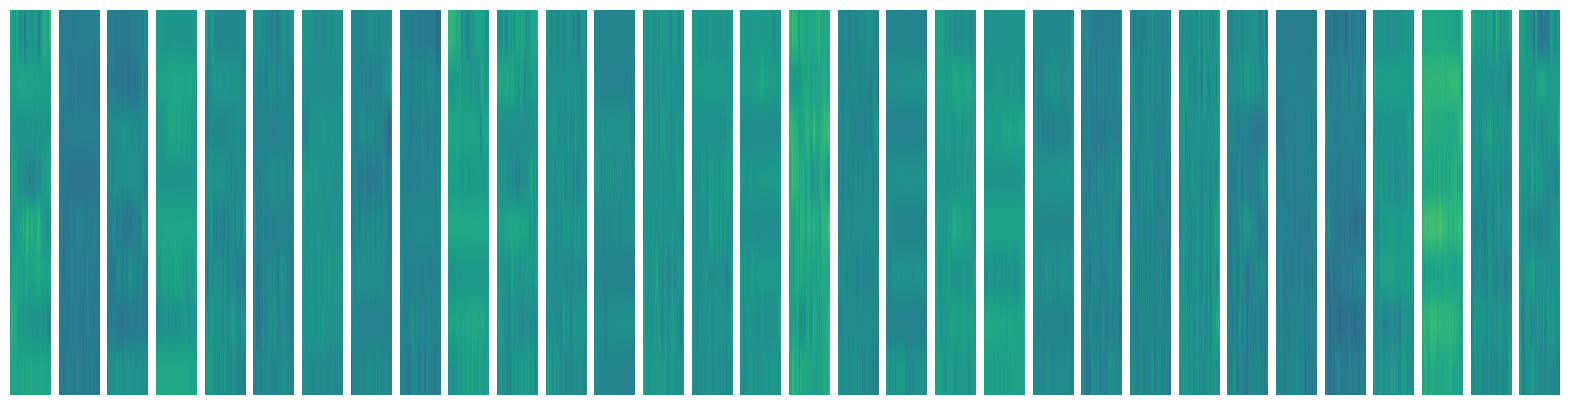

Visualizing filters for layer: conv1d_4


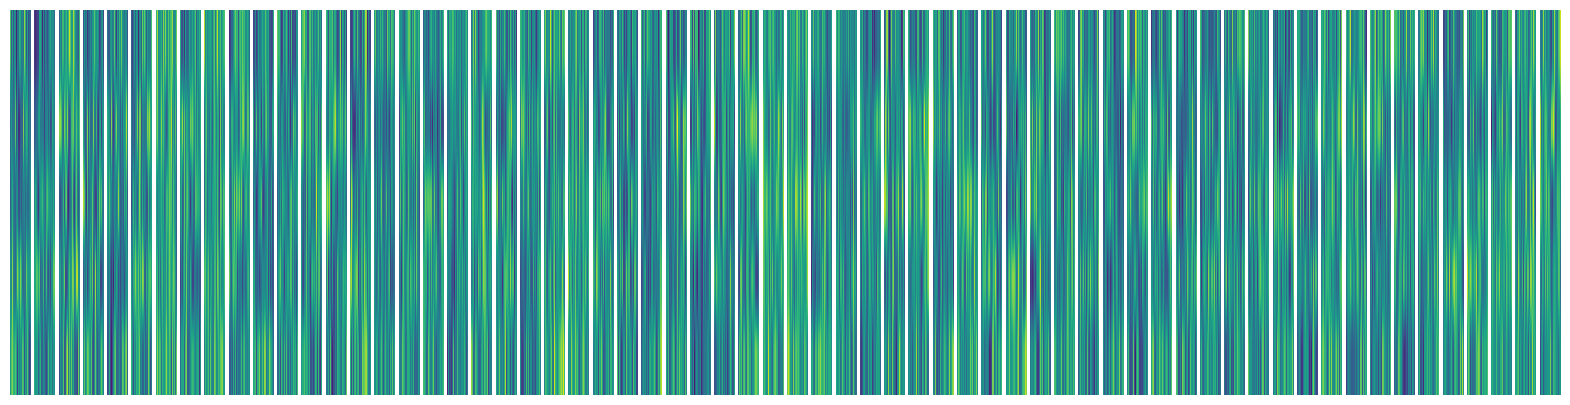

Visualizing filters for layer: conv1d_5


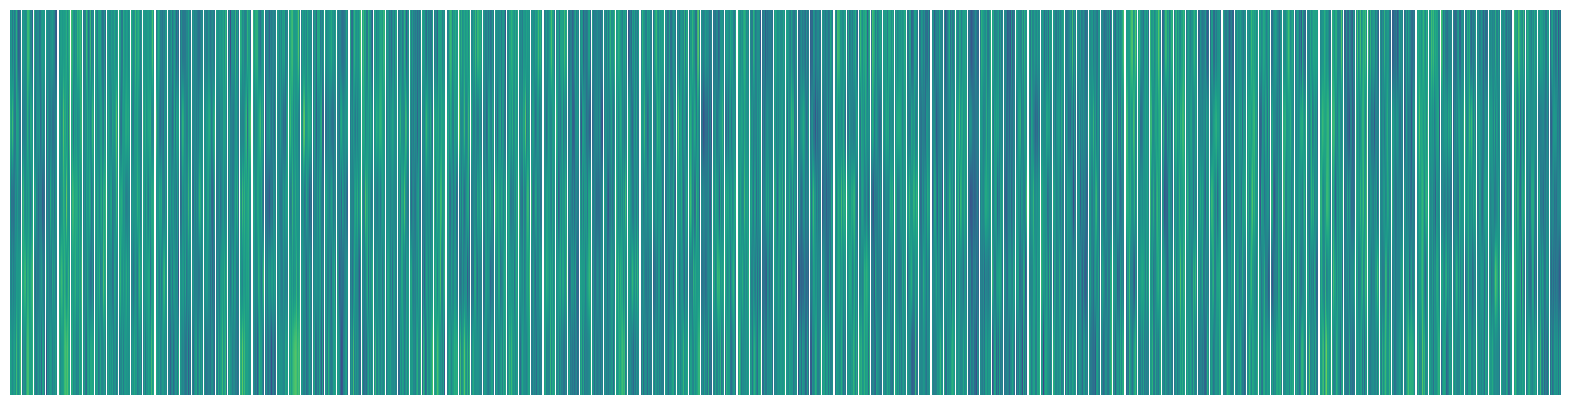

In [ ]:

x_train = np.random.rand(10, 20, 25000).astype(np.float32)  # Dummy data for demonstration
cnn_model.predict(x_train[:1])

def visualize_filters(model, layer_name):
    """
    Visualize the filters of a convolutional layer.
    
    Parameters:
    model (tensorflow.keras.Model): The trained model.
    layer_name (str): The name of the convolutional layer.
    """
    layer = model.get_layer(name=layer_name)
    filters, biases = layer.get_weights()
    
    # Normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    n_filters = filters.shape[-1]
    fig, axes = plt.subplots(1, n_filters, figsize=(20, 5))
    
    for i in range(n_filters):
        f = filters[:, :, i]
        axes[i].imshow(f, aspect='auto', cmap='viridis')
        axes[i].axis('off')
    
    plt.show()

# Get the names of the convolutional layers
conv_layer_names = [layer.name for layer in cnn_model.layers if isinstance(layer, tf.keras.layers.Conv1D)]

# Visualize the filters for each convolutional layer
for layer_name in conv_layer_names:
    print(f"Visualizing filters for layer: {layer_name}")
    visualize_filters(cnn_model, layer_name)

In [22]:
def load_mfcc_files(directory):
    mfcc_data = []
    files=[]
    for file in os.listdir(directory):
            print(file)
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path, header=None).values
            mfcc_data.append(data)
            files.append(file)
            print(data.shape)
    return mfcc_data,files
test_data,file_names = load_mfcc_files(r'C:\Users\Dnyaneshwari\Desktop\DS FINAL\csv_new_resize\csv_new_resize')
test_data = np.array(test_data,dtype='float32')
print(test_data.shape)

01-MFCC.csv
(20, 25000)
02-MFCC.csv
(20, 25000)
03-MFCC.csv
(20, 25000)
04-MFCC.csv
(20, 25000)
05-MFCC.csv
(20, 25000)
06-MFCC.csv
(20, 25000)
07-MFCC.csv
(20, 25000)
08-MFCC.csv
(20, 25000)
09-MFCC.csv
(20, 25000)
10-MFCC.csv
(20, 25000)
100-MFCC.csv
(20, 25000)
101-MFCC.csv
(20, 25000)
102-MFCC.csv
(20, 25000)
103-MFCC.csv
(20, 25000)
104-MFCC.csv
(20, 25000)
105-MFCC.csv
(20, 25000)
106-MFCC.csv
(20, 25000)
107-MFCC.csv
(20, 25000)
108-MFCC.csv
(20, 25000)
109-MFCC.csv
(20, 25000)
11-MFCC.csv
(20, 25000)
110-MFCC.csv
(20, 25000)
111-MFCC.csv
(20, 25000)
112-MFCC.csv
(20, 25000)
113-MFCC.csv
(20, 25000)
114-MFCC.csv
(20, 25000)
115-MFCC.csv
(20, 25000)
116-MFCC.csv
(20, 25000)
12-MFCC.csv
(20, 25000)
13-MFCC.csv
(20, 25000)
14-MFCC.csv
(20, 25000)
15-MFCC.csv
(20, 25000)
16-MFCC.csv
(20, 25000)
17-MFCC.csv
(20, 25000)
18-MFCC.csv
(20, 25000)
19-MFCC.csv
(20, 25000)
20-MFCC.csv
(20, 25000)
21-MFCC.csv
(20, 25000)
22-MFCC.csv
(20, 25000)
23-MFCC.csv
(20, 25000)
24-MFCC.csv
(20, 25000)

In [23]:
prediction = cnn_model.predict(test_data) 
print(prediction)
print(prediction.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
[[1.54109555e-04 9.29142043e-05 1.42176679e-04 2.50901619e-04 2.41226226e-04 9.99118626e-01]
 [1.35200055e-04 4.33101886e-05 2.97977022e-05 1.61146017e-04 1.47014624e-04 9.99483585e-01]
 [6.95664659e-02 5.11786377e-04 2.12447578e-03 1.77715853e-01 7.45179176e-01 4.90227714e-03]
 [4.65511262e-01 1.70032140e-02 1.08640653e-03 4.44461524e-01 6.38748780e-02 8.06279294e-03]
 [1.76549074e-04 2.92980764e-02 9.69278276e-01 5.43143600e-04 1.63964040e-04 5.39968896e-04]
 [7.02620149e-01 1.18464530e-01 1.10783942e-01 3.38455513e-02 2.76480913e-02 6.63768779e-03]
 [4.43512648e-02 5.47439605e-02 8.67045343e-01 1.21193770e-02 9.55406576e-03 1.21860188e-02]
 [4.76354271e-01 3.87583999e-03 1.25704415e-03 2.06611454e-01 2.97891408e-01 1.40098985e-02]
 [2.98791640e-02 1.63933694e-01 7.51294076e-01 2.68372353e-02 2.26271395e-02 5.42861922e-03]
 [4.86638248e-01 1.77145228e-02 3.14010471e-01 2.28932723e-02 1.43862829e-01 1.48806376e-02]
 [6.95509166e-02 1.05123438e-01 

In [24]:
converted_predictions = np.where(prediction > 0.5, 1, 0)
print(converted_predictions)

[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 

In [25]:
decoded_labels = lb.inverse_transform(converted_predictions)


np.set_printoptions(threshold=np.inf, linewidth=np.inf) # This ensures no truncation

decoded_labels=np.array(decoded_labels)

# Print the entire array
print(decoded_labels )


['national' 'national' 'michael' 'asha' 'kishor' 'asha' 'kishor' 'asha' 'kishor' 'asha' 'asha' 'kishor' 'bhavgeet' 'michael' 'asha' 'asha' 'bhavgeet' 'national' 'national' 'kishor' 'asha' 'asha' 'bhavgeet' 'lavni' 'asha' 'asha' 'lavni' 'national' 'asha' 'asha' 'kishor' 'asha' 'national' 'national' 'kishor' 'lavni' 'asha' 'michael' 'kishor' 'asha' 'kishor' 'bhavgeet' 'bhavgeet' 'national' 'kishor' 'bhavgeet' 'asha' 'national' 'asha' 'lavni' 'kishor' 'national' 'michael' 'asha' 'bhavgeet' 'lavni' 'asha' 'lavni' 'bhavgeet' 'lavni' 'asha' 'asha' 'kishor' 'lavni' 'lavni' 'bhavgeet' 'bhavgeet' 'kishor' 'asha' 'asha' 'kishor' 'kishor' 'kishor' 'lavni' 'kishor' 'kishor' 'asha' 'national' 'lavni' 'kishor' 'asha' 'kishor' 'national' 'national' 'kishor' 'asha' 'asha' 'asha' 'lavni' 'asha' 'asha' 'national' 'kishor' 'lavni' 'lavni' 'lavni' 'asha' 'national' 'asha' 'kishor' 'kishor' 'lavni' 'michael' 'national' 'lavni' 'asha' 'national' 'lavni' 'kishor' 'kishor' 'bhavgeet' 'national' 'bhavgeet' 'bh

In [26]:
final=np.array(file_names)
final_predictions = np.column_stack((final, decoded_labels))
print(final_predictions)
np.savetxt('final_predictions.csv', final_predictions, delimiter=',', fmt='%s', header='File_Name,Category', comments='')

[['01-MFCC.csv' 'national']
 ['02-MFCC.csv' 'national']
 ['03-MFCC.csv' 'michael']
 ['04-MFCC.csv' 'asha']
 ['05-MFCC.csv' 'kishor']
 ['06-MFCC.csv' 'asha']
 ['07-MFCC.csv' 'kishor']
 ['08-MFCC.csv' 'asha']
 ['09-MFCC.csv' 'kishor']
 ['10-MFCC.csv' 'asha']
 ['100-MFCC.csv' 'asha']
 ['101-MFCC.csv' 'kishor']
 ['102-MFCC.csv' 'bhavgeet']
 ['103-MFCC.csv' 'michael']
 ['104-MFCC.csv' 'asha']
 ['105-MFCC.csv' 'asha']
 ['106-MFCC.csv' 'bhavgeet']
 ['107-MFCC.csv' 'national']
 ['108-MFCC.csv' 'national']
 ['109-MFCC.csv' 'kishor']
 ['11-MFCC.csv' 'asha']
 ['110-MFCC.csv' 'asha']
 ['111-MFCC.csv' 'bhavgeet']
 ['112-MFCC.csv' 'lavni']
 ['113-MFCC.csv' 'asha']
 ['114-MFCC.csv' 'asha']
 ['115-MFCC.csv' 'lavni']
 ['116-MFCC.csv' 'national']
 ['12-MFCC.csv' 'asha']
 ['13-MFCC.csv' 'asha']
 ['14-MFCC.csv' 'kishor']
 ['15-MFCC.csv' 'asha']
 ['16-MFCC.csv' 'national']
 ['17-MFCC.csv' 'national']
 ['18-MFCC.csv' 'kishor']
 ['19-MFCC.csv' 'lavni']
 ['20-MFCC.csv' 'asha']
 ['21-MFCC.csv' 'michael']
 ['22